<font color='slateblue' size=6 align='center'><p style='text-align: center;'>**MI ULTIMO CUADERNITO JUPYTER**\
<font color=mediumpurple size=5>**Karol Rojas Buitrago**\
<font color=dodgerblue size=5>**Enrique Mejía Ospino, emejia@uis.edu.co**\
 <font color=lightskyblue size=5>**Analisis y Tratamientos de Datos en Quimica**\
<font color=limegreen size=5>         **Universidad Industrial de Santander**

In [166]:
import numpy as np
# De sklearn utilizaremos las funciones para desarrollar el modelo y evaluarlo con las métricas correspondientes
from sklearn import preprocessing
from sklearn.model_selection import cross_validate # difference from course
from sklearn.neighbors import KNeighborsClassifier # K-Vecinos cercanos
from sklearn.svm import SVC # Vector de soporte clasificador (SVM)
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score # Métricas
from pandas.plotting import scatter_matrix # Visualización con pandas
import matplotlib.pyplot as plt # Visualización de resultados
import pandas as pd # Manejo de los datos
from numpy import *
import pandas as pd
from sympy import integrate, var, diff, exp, oo
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import scipy.io #scipy.io me permite leer datos construidos en matlab
from scipy import stats # importando scipy.stats
from scipy.signal import savgol_filter
import scipy as sio
%matplotlib inline

<font color=lightskyblue size=5>**TRATAMIENTO AZUL DE TIMOL** 

In [167]:
data = pd.read_excel('\\Users\\Usuario\\OneDrive\\Analisis_Datos_Quimica-main\\Datos\\Datos-azul-timol.xlsx')
data = data.set_axis(['Muestras', 'Abs 1', 'Muestra 2', 'Abs 2', 'Muestra 3', 'Abs 3', 'Concentración [M]', 'Longitud de onda', ' Abs'], axis=1)
data = data.drop([0], axis=0)
data = data.drop(['Longitud de onda', ' Abs', 'Muestra 2', 'Muestra 3'], axis=1)
data= data.dropna()
data

,Muestras,Abs 1,Abs 2,Abs 3,Concentración [M]
1,Blanco,0.002,0.002,0.002,0
2,Patrón 1,0.1,0.09,0.089,0.000003
3,Blanco,0,0,-0.001,0
4,Patrón 2,0.276,0.267,0.267,0.00001
5,Blanco,-0.001,-0.001,-0.002,0
6,Patrón 3,0.484,0.482,0.483,0.000017
7,Blanco,-0.001,0.001,0.001,0
8,Patrón 4,0.674,0.66,0.659,0.000024
9,Blanco,0.001,0.001,0,0
10,Patrón 5,0.877,0.877,0.877,0.000031


In [168]:
data.shape # Un primera inspección podría ser conocer el tamaño del archivo de datos

(18, 5)

In [169]:
data.columns 

Index(['Muestras', 'Abs 1', 'Abs 2', 'Abs 3', 'Concentración [M]'], dtype='object')

In [170]:
Pro = data[['Abs 1', 'Abs 2', 'Abs 3']].mean(axis=1)
Pro = Pro.T
Pro = pd.DataFrame(Pro)
Pro = Pro.set_axis(['Promedio Abs'], axis=1)

N = data[['Muestras']]
N

Promedios = pd.concat([N, Pro], axis=1)
Promedios



,Muestras,Promedio Abs
1,Blanco,0.002000
2,Patrón 1,0.093000
3,Blanco,-0.000333
4,Patrón 2,0.270000
5,Blanco,-0.001333
6,Patrón 3,0.483000
7,Blanco,0.000333
8,Patrón 4,0.664333
9,Blanco,0.000667
10,Patrón 5,0.877000


In [171]:
PromBlancos = Promedios.drop([2, 4, 6, 8, 10, 12, 14, 16, 18], axis=0)
PromBlancos = PromBlancos[['Promedio Abs']].mean()
PromBlancos

Promedio Abs    0.000778
dtype: float64

In [172]:
Patrones = Promedios.drop([3, 5, 7, 9, 11, 13, 15, 17], axis=0)
Patrones.iloc[0,1]=0.000778
Patrones

,Muestras,Promedio Abs
1,Blanco,0.000778
2,Patrón 1,0.093000
4,Patrón 2,0.270000
6,Patrón 3,0.483000
8,Patrón 4,0.664333
10,Patrón 5,0.877000
12,Patrón 6,1.040667
14,Patrón 7,1.266667
16,Patrón 8,1.478000
18,Patrón 9,1.657333


In [173]:
Concentraciones = data.drop([3, 5, 7, 9, 11, 13, 15, 17], axis=0)
Concentraciones = Concentraciones.drop([ 'Abs 1', 'Abs 2', 'Abs 3'], axis=1)
Concentraciones 

,Muestras,Concentración [M]
1,Blanco,0
2,Patrón 1,0.000003
4,Patrón 2,0.00001
6,Patrón 3,0.000017
8,Patrón 4,0.000024
10,Patrón 5,0.000031
12,Patrón 6,0.000038
14,Patrón 7,0.000045
16,Patrón 8,0.000052
18,Patrón 9,0.000059


In [174]:
RL = pd.concat([Patrones, Concentraciones], axis=1)
RL


,Muestras,Promedio Abs,Muestras,Concentración [M]
1,Blanco,0.000778,Blanco,0
2,Patrón 1,0.093000,Patrón 1,0.000003
4,Patrón 2,0.270000,Patrón 2,0.00001
6,Patrón 3,0.483000,Patrón 3,0.000017
8,Patrón 4,0.664333,Patrón 4,0.000024
10,Patrón 5,0.877000,Patrón 5,0.000031
12,Patrón 6,1.040667,Patrón 6,0.000038
14,Patrón 7,1.266667,Patrón 7,0.000045
16,Patrón 8,1.478000,Patrón 8,0.000052
18,Patrón 9,1.657333,Patrón 9,0.000059


In [175]:
data.shape

(18, 5)

In [176]:
x1=data.values.reshape(18, 5) # Los datos se convierten al formato tipo arreglo
y1=data.values.reshape(18, 5)

In [177]:


import sklearn.metrics as skm
from sklearn import linear_model
x = RL[['Concentración [M]']] 
y=RL[['Promedio Abs']]
reg = linear_model.LinearRegression()
reg.fit(x, y)
y1_pred = reg.predict(x)
m=reg.coef_[0]
b=reg.intercept_[0]
mse=skm.mean_squared_error(y, y1_pred)
r2=skm.r2_score(y, y1_pred)


In [178]:
import sklearn.metrics as skm
from sklearn import linear_model
x = RL[['Concentración [M]']] 
y=RL[['Promedio Abs']]
reg = linear_model.LinearRegression()
reg.fit(x, y)
y1_pred = reg.predict(x)
m=reg.coef_[0]
b=reg.intercept_[0]
mse=skm.mean_squared_error(y, y1_pred)
r2=skm.r2_score(y, y1_pred)


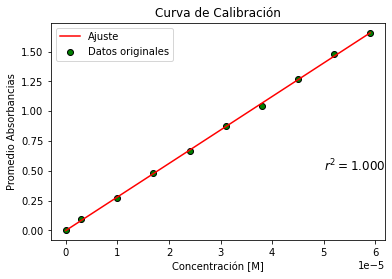

In [179]:
y1_pred = np.array(y1_pred)
x = np.array(x)
y = np.array(y)
fig, ax= plt.subplots()
ax.scatter(x, y, color='green', label='Datos originales', edgecolors='black')
ax.plot(x, y1_pred, 'r', label='Ajuste')
ax.legend()
ax.set_title("Curva de Calibración")
ax.set_xlabel("Concentración [M]")
ax.set_ylabel("Promedio Absorbancias")
ax.text(5e-5,0.50, r"$r^2 = "+str("{0:.3f}".format(r2))+r"$", fontsize=12, color="black")
plt.show()

<font color=lightskyblue size=5>**Regresión Lineal Multivariado: PLS** 

In [180]:
IR = pd.read_excel('\\Users\\Usuario\\OneDrive\\Analisis_Datos_Quimica-main\\Datos\\ASCI_IR (1).xlsx', header=None)
IR.drop([0],axis=0, inplace=True)
IR =  IR.T
IR= IR.dropna()
IR

,1,2,3,4,5,6,7,8,9,10,...,7458,7459,7460,7461,7462,7463,7464,7465,7466,7467
0,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,0.009071,0.009146,0.009266,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
1,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,0.013398,0.013700,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
2,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,0.017675,0.017899,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
3,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,0.013989,0.013653,...,0.011477,0.011465,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,0.011480
4,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,0.007492,0.008316,...,0.003165,0.003165,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,0.003145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.040392,0.039723,0.038974,0.038242,0.037590,0.037043,0.036593,0.036229,0.035947,0.035766,...,0.000099,0.000091,0.000081,0.000070,0.000057,0.000043,0.000029,0.000017,0.000007,0.000000
77,0.012234,0.012054,0.011595,0.011025,0.010495,0.010095,0.009845,0.009712,0.009647,0.009617,...,0.000554,0.000552,0.000548,0.000543,0.000539,0.000535,0.000533,0.000533,0.000534,0.000538
78,0.014849,0.014527,0.014288,0.014117,0.013987,0.013858,0.013693,0.013464,0.013171,0.012838,...,0.011690,0.011689,0.011688,0.011688,0.011689,0.011689,0.011687,0.011686,0.011684,0.011684
79,0.015313,0.016455,0.017791,0.019159,0.020383,0.021306,0.021820,0.021896,0.021586,0.021012,...,0.011802,0.011811,0.011820,0.011828,0.011834,0.011839,0.011844,0.011849,0.011856,0.011863


In [181]:
IR.columns #Lista de columnas

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            7458, 7459, 7460, 7461, 7462, 7463, 7464, 7465, 7466, 7467],
           dtype='int64', length=7467)

In [182]:
IR.columns #Lista de columnas

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            7458, 7459, 7460, 7461, 7462, 7463, 7464, 7465, 7466, 7467],
           dtype='int64', length=7467)

In [183]:
CR = pd.read_excel('\\Users\\Usuario\\OneDrive\\\Analisis_Datos_Quimica-main\Datos\\Informacion Crudos20.xlsx', header=None)
CR.set_axis(['X', 'X', 'X', 'X', 'ASCI', 'IN(ASCI)', 'X', 'X', 'X', 'X', 'X', 'X'], axis=1, inplace=True)
CR.drop(['X'],axis=1, inplace=True)
CR.drop([0],axis=0,inplace=True)
CR = CR.reset_index(drop=True)
prop1 = CR[["ASCI"]]
prop2 = CR[["IN(ASCI)"]]
CR=CR.dropna()
CR

,ASCI,IN(ASCI)
0,9,55
1,12,40
2,10,50
3,10,50
4,13,35
...,...,...
76,7,65
77,9,55
78,8,60
79,11,45


In [184]:
IR1 = np.array(IR)
prop1 = np.array(prop1)
prop2 = np.array(prop2)

In [185]:
IR.shape, prop1.shape, prop2.shape # miramos la forma para ver si concuerdan, en este
# caso 81 muestras y 7467 señales de masas

((81, 7467), (81, 1), (81, 1))

In [186]:
#normalizamos los datos
scaler=StandardScaler()
norma=Normalizer()

scaler.fit(IR) # calculo la media para poder hacer la transformacion
x_scaled=scaler.transform(IR)# Ahora si, escalo los datos y los normalizo
x_norm = preprocessing.normalize(IR, norm='l1')# Normaliza los datos
x_nsd = savgol_filter(x_norm, 17, polyorder=2, deriv=2) # Realiza segunda derivada de los datos

<font color='lightskyblue' size=5>**PROPIEDAD 1**

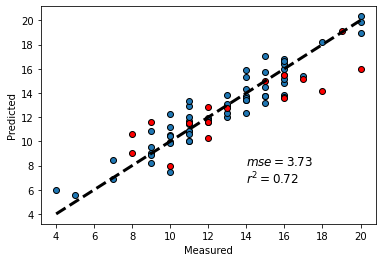

MSE = 3.73


In [187]:
#Set de entrenamiento y set de prueba
x_train, x_test, y_train, y_test = train_test_split(x_norm, prop1, train_size=0.8, random_state=37, shuffle= True)

pls = PLSRegression(n_components=10)
pls.fit(x_train, y_train)

y_pred = pls.predict(x_train)
y_pred_test = pls.predict(x_test)
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(14,8, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(14,6.5, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_test, y_pred_test), 2)))

In [188]:
def optimise_pls(X, y, xt, n_comp):
    
    # Definimos PLS y el número de componentes
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_pred1 = pls.predict(X)
    y_pred2 = pls.predict(xt)
    # Calculamos métricas
    r2 = r2_score(y, y_pred1)
    mse = mean_squared_error(y, y_pred1)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_pred1, y_pred2, r2, mse, rpd)

In [189]:
#50 componentes
r2s = []
mses = []
rpds = []
yp1 = []
yp2 = []
arr_comp = np.arange(1, 51)
for n_comp in arr_comp:
    y_pred1, y_pred2, r2, mse, rpd = optimise_pls(x_train, y_train, x_test, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)
    yp1.append(y_pred1)
    yp2.append(y_pred2)

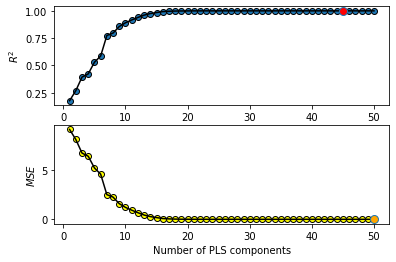

In [190]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(arr_comp, r2s, edgecolors=(0, 0, 0))
ax1.plot(arr_comp, r2s, 'k-')
ax1.plot(arr_comp[np.argmax(r2s)], np.array(r2s)[np.argmax(r2s)], 'o', ms=8, mfc='red')
ax1.set_xlabel('Number of PLS components')
ax1.set_ylabel('$R^2$')

ax2.scatter(arr_comp, mses, color='yellow', edgecolors=(0, 0, 0))
ax2.plot(arr_comp, mses, 'k-')
ax2.plot(arr_comp[np.argmin(mses)], np.array(mses)[np.argmin(mses)], 'o', ms=8, mfc='orange')
ax2.set_xlabel('Number of PLS components')
ax2.set_ylabel('$MSE$')
plt.show()

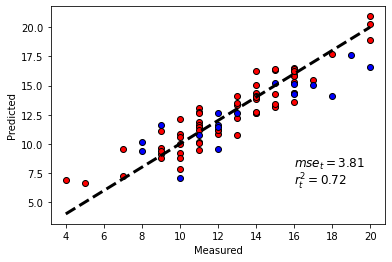

MSE = 1.59


In [191]:
fig, ax = plt.subplots()
ax.scatter(y_train, yp1[8], color='red', edgecolors=(0, 0, 0))
ax.scatter(y_test, yp2[10], color='blue', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(16,8, r"$mse_t = "+str(round(mean_squared_error(y_test, yp2[10]), 2))+r"$", fontsize=12, color="black")
ax.text(16,6.5, r"$r_t^2 = "+str(round(r2_score(y_test, yp2[10]), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_train, yp1[8]), 2)))

**<font color=dodgerblue size=5> Seguidamente vamos a realizar un modelo *PLS* utilizando *K-fold* y evaluando cada uno de los modelos originados de las diferentes separaciones através de las métricas $R^2$ y $MSE$.** 

In [192]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model=PLSRegression(n_components=10) 
x_traint = []
x_testt = [] 
y_traint = []
y_testt = []
r2s = []
mses = []

i = 1
for train_index, test_index in kf.split(x_norm):
    x_train = x_norm[train_index]
    x_test = x_norm[test_index]
    y_train = prop1[train_index]
    y_test = prop1[test_index]
    model.fit(x_train, y_train) 
    mse = mean_squared_error(y_test, model.predict(x_test))
    r2= r2_score(y_test, model.predict(x_test))
    
 
    x_traint.append(x_train) 
    x_testt.append(x_test)
    y_traint.append(y_train)
    y_testt.append(y_test)
    r2s.append(r2)
    mses.append(mse)
   
  
    model.fit(x_train, y_train) #Training the model
    print(f"MSE. {i} on the test set: {mean_squared_error(y_test, model.predict(x_test))}")
    print(f"R2. {i} on the test set: {r2_score(y_test, model.predict(x_test))}")
    i += 1

MSE. 1 on the test set: 6.586410852471983
R2. 1 on the test set: 0.5040456653558096
MSE. 2 on the test set: 13.946035241278068
R2. 2 on the test set: 0.1000289836735101
MSE. 3 on the test set: 9.068069246167841
R2. 3 on the test set: -0.17540543140200882
MSE. 4 on the test set: 3.978471100668795
R2. 4 on the test set: 0.6573053156893636
MSE. 5 on the test set: 6.790129299240334
R2. 5 on the test set: 0.15412501187079053


**<font color=dodgerblue size=5> Vamos a convertir el mejor set (el de mejor comportamiento) en arreglos númerico y luego seran usados para construir el modelo PLS.** 

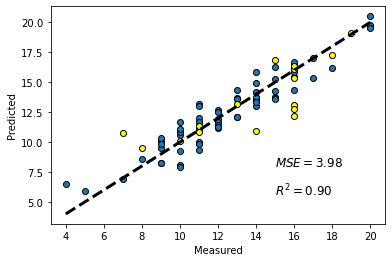

In [193]:
y_tr=np.array(y_traint[r2s.index(max(r2s))]) 
y_te=np.array(y_testt[r2s.index(max(r2s))]) 
X_tr=np.array(x_traint[r2s.index(max(r2s))]) 
X_te=np.array(x_testt[r2s.index(max(r2s))])
model.fit(X_tr, y_tr) 

Y_pred = model.predict(X_tr) 
Y_pred_test = model.predict(X_te) 

fig, ax = plt.subplots()
ax.scatter(y_tr, Y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_te, Y_pred_test, color='yellow', label='test set', edgecolors=(0, 0, 0))
ax.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'k--', lw=3)
ax.text(15,8, r"$MSE = "+str("{0:.2f}".format(mean_squared_error(y_te, Y_pred_test)))+r"$", fontsize=12, color="black")
ax.text(15,5.5, r"$R^2 = "+str("{0:.2f}".format(r2_score(y_tr, Y_pred)))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<font color='lightskyblue' size=5>**PROPIEDAD 2**

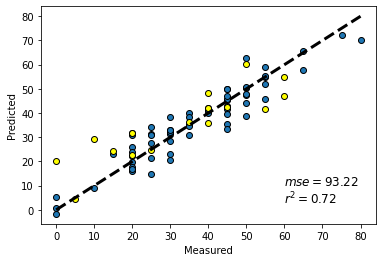

MSE = 93.22


In [201]:
#Set de entrenamiento y set de prueba
x_train, x_test, y_train, y_test = train_test_split(x_norm, prop2, train_size=0.8, random_state=37, shuffle= True)

pls = PLSRegression(n_components=10)
pls.fit(x_train, y_train)

y_pred = pls.predict(x_train)
y_pred_test = pls.predict(x_test)
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_test, y_pred_test, color='yellow', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(60,10, r"$mse = "+str(round(mean_squared_error(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.text(60,2.5, r"$r^2 = "+str(round(r2_score(y_test, y_pred_test), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_test, y_pred_test), 2)))

In [195]:
def optimise_pls(X, y, xt, n_comp):
    
 
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_pred1 = pls.predict(X)
    y_pred2 = pls.predict(xt)
    # Calculamos métricas
    r2 = r2_score(y, y_pred1)
    mse = mean_squared_error(y, y_pred1)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_pred1, y_pred2, r2, mse, rpd)

In [196]:
#50 componentes
r2s = []
mses = []
rpds = []
yp1 = []
yp2 = []
arr_comp = np.arange(1, 51)
for n_comp in arr_comp:
    y_pred1, y_pred2, r2, mse, rpd = optimise_pls(x_train, y_train, x_test, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)
    yp1.append(y_pred1)
    yp2.append(y_pred2)

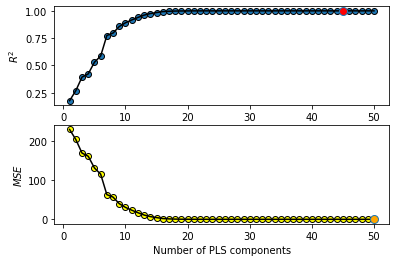

In [197]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(arr_comp, r2s, edgecolors=(0, 0, 0))
ax1.plot(arr_comp, r2s, 'k-')
ax1.plot(arr_comp[np.argmax(r2s)], np.array(r2s)[np.argmax(r2s)], 'o', ms=8, mfc='red')
ax1.set_xlabel('Number of PLS components')
ax1.set_ylabel('$R^2$')

ax2.scatter(arr_comp, mses, color='yellow', edgecolors=(0, 0, 0))
ax2.plot(arr_comp, mses, 'k-')
ax2.plot(arr_comp[np.argmin(mses)], np.array(mses)[np.argmin(mses)], 'o', ms=8, mfc='orange')
ax2.set_xlabel('Number of PLS components')
ax2.set_ylabel('$MSE$')
plt.show()

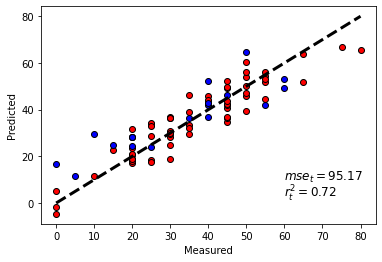

MSE = 39.74


In [198]:
fig, ax = plt.subplots()
ax.scatter(y_train, yp1[8], color='red', edgecolors=(0, 0, 0))
ax.scatter(y_test, yp2[10], color='blue', edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.text(60,10, r"$mse_t = "+str(round(mean_squared_error(y_test, yp2[10]), 2))+r"$", fontsize=12, color="black")
ax.text(60,2.5, r"$r_t^2 = "+str(round(r2_score(y_test, yp2[10]), 2))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print('MSE = ' + str(round(mean_squared_error(y_train, yp1[8]), 2)))

**<font color=dodgerblue size=5> Seguidamente vamos a realizar un modelo *PLS* utilizando *K-fold* y evaluando cada uno de los modelos originados de las diferentes separaciones através de las métricas $R^2$ y $MSE$.** 

In [199]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model=PLSRegression(n_components=10)
x_traint = [] 
x_testt = [] 
y_traint = []
y_testt = []
r2s = []
mses = []

i = 1
for train_index, test_index in kf.split(x_norm):
    x_train = x_norm[train_index]
    x_test = x_norm[test_index]
    y_train = prop2[train_index]
    y_test = prop2[test_index]
    model.fit(x_train, y_train) 
    mse = mean_squared_error(y_test, model.predict(x_test))
    r2= r2_score(y_test, model.predict(x_test))
    
    
    x_traint.append(x_train) 
    x_testt.append(x_test)
    y_traint.append(y_train)
    y_testt.append(y_test)
    r2s.append(r2)
    mses.append(mse)
   
    
    model.fit(x_train, y_train)
    print(f"MSE. {i} on the test set: {mean_squared_error(y_test, model.predict(x_test))}")
    print(f"R2. {i} on the test set: {r2_score(y_test, model.predict(x_test))}")
    i += 1

MSE. 1 on the test set: 164.66027131180076
R2. 1 on the test set: 0.5040456653558059
MSE. 2 on the test set: 348.65088103195285
R2. 2 on the test set: 0.1000289836735071
MSE. 3 on the test set: 226.70173115419558
R2. 3 on the test set: -0.17540543140200637
MSE. 4 on the test set: 99.46177751672124
R2. 4 on the test set: 0.6573053156893589
MSE. 5 on the test set: 169.7532324810083
R2. 5 on the test set: 0.15412501187079075


**<font color=dodgerblue size=5> Vamos a convertir el mejor set (el de mejor comportamiento) en arreglos númerico y luego seran usados para construir el modelo PLS.** 

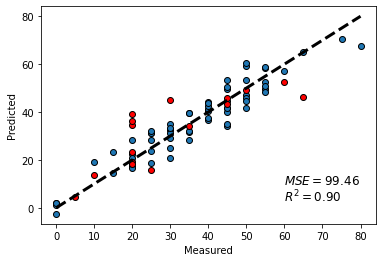

In [200]:
y_tr=np.array(y_traint[r2s.index(max(r2s))]) 
y_te=np.array(y_testt[r2s.index(max(r2s))]) 
X_tr=np.array(x_traint[r2s.index(max(r2s))]) 
X_te=np.array(x_testt[r2s.index(max(r2s))])
model.fit(X_tr, y_tr) 

Y_pred = model.predict(X_tr) 
Y_pred_test = model.predict(X_te)

fig, ax = plt.subplots()
ax.scatter(y_tr, Y_pred, edgecolors=(0, 0, 0))
ax.scatter(y_te, Y_pred_test, color='red', label='test set', edgecolors=(0, 0, 0))
ax.plot([y_tr.min(), y_tr.max()], [y_tr.min(), y_tr.max()], 'k--', lw=3)
ax.text(60,10, r"$MSE = "+str("{0:.2f}".format(mean_squared_error(y_te, Y_pred_test)))+r"$", fontsize=12, color="black")
ax.text(60,2.5, r"$R^2 = "+str("{0:.2f}".format(r2_score(y_tr, Y_pred)))+r"$", fontsize=12, color="black")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<font color=lightskyblue size=5>**Análisis de Componentes Principales: PCA** 

In [202]:
IR = pd.read_excel('\\Users\\Usuario\\OneDrive\\Analisis_Datos_Quimica-main\\Datos\\ASCI_IR (1).xlsx', header=None)
IR.drop([0],axis=0, inplace=True)
IR =  IR.T
IR= IR.dropna()
IR

,1,2,3,4,5,6,7,8,9,10,...,7458,7459,7460,7461,7462,7463,7464,7465,7466,7467
0,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,0.009071,0.009146,0.009266,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
1,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,0.013398,0.013700,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
2,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,0.017675,0.017899,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
3,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,0.013989,0.013653,...,0.011477,0.011465,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,0.011480
4,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,0.007492,0.008316,...,0.003165,0.003165,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,0.003145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.040392,0.039723,0.038974,0.038242,0.037590,0.037043,0.036593,0.036229,0.035947,0.035766,...,0.000099,0.000091,0.000081,0.000070,0.000057,0.000043,0.000029,0.000017,0.000007,0.000000
77,0.012234,0.012054,0.011595,0.011025,0.010495,0.010095,0.009845,0.009712,0.009647,0.009617,...,0.000554,0.000552,0.000548,0.000543,0.000539,0.000535,0.000533,0.000533,0.000534,0.000538
78,0.014849,0.014527,0.014288,0.014117,0.013987,0.013858,0.013693,0.013464,0.013171,0.012838,...,0.011690,0.011689,0.011688,0.011688,0.011689,0.011689,0.011687,0.011686,0.011684,0.011684
79,0.015313,0.016455,0.017791,0.019159,0.020383,0.021306,0.021820,0.021896,0.021586,0.021012,...,0.011802,0.011811,0.011820,0.011828,0.011834,0.011839,0.011844,0.011849,0.011856,0.011863


In [204]:
val=IR.values
valt=val.T
valtn = preprocessing.normalize(valt, norm='l1')# Normaliza los datos

In [203]:
CR = pd.read_excel('\\Users\\Usuario\\OneDrive\\\Analisis_Datos_Quimica-main\Datos\\Informacion Crudos20.xlsx', header=None)
CR.set_axis(['X', 'X', 'X', 'X', 'ASCI', 'IN(ASCI)', 'X', 'X', 'X', 'X', 'X', 'X'], axis=1, inplace=True)
CR.drop(['X'],axis=1, inplace=True)
CR.drop([0],axis=0,inplace=True)
CR = CR.reset_index(drop=True)
prop1 = CR[["ASCI"]]
prop2 = CR[["IN(ASCI)"]]
CR=CR.dropna()
CR

,ASCI,IN(ASCI)
0,9,55
1,12,40
2,10,50
3,10,50
4,13,35
...,...,...
76,7,65
77,9,55
78,8,60
79,11,45


In [206]:
# Iniciamos el desarrollo del PCA en este caso con 9 componentes
pca=PCA(n_components=9) # Otra opción es hacer pca hasta obtener un mínimo explicado ej.: pca=PCA(.85)
pca1=pca.fit(valtn) # obtener los componentes principales
datos_pca=pca.transform(valtn) # convertimos nuestros datos con las nuevas dimensiones de PCA, scores

#out = pca.fit_transform(valtn) # otra opción

# Esta celda es para observar la varianza explicada con 5 componentes, se podría variar a los que se quisiese
print("dimensión datos_pca", datos_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:9]))
#Vemos que con 9 componentes tenemos algo mas del 95% de varianza explicada
datos_pca1 = pd.DataFrame(datos_pca) # Convierte los datos pca en un DataFrame
datos_pca1=pd.concat([datos_pca1, CR] ,axis=1) # Se agrega la columna del tipo de muestra

dimensión datos_pca (7467, 9)
[0.75143525 0.16992412 0.02978127 0.01732613 0.01425133 0.00444205
 0.00156406 0.00121421 0.000806  ]
suma: 0.9907444303633081


In [209]:
scores_df = pd.DataFrame(datos_pca, columns = [f"PC{i+1}" for i in range(datos_pca.shape[1])])
scores_df#pcd es reduccion de datos

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.031709,-0.023160,0.009153,-0.008505,0.010238,-0.002047,-0.009627,0.004463,0.005872
1,-0.030859,-0.023554,0.009327,-0.008621,0.010124,-0.001521,-0.009557,0.004672,0.005117
2,-0.030087,-0.023982,0.009733,-0.008670,0.010073,-0.001043,-0.009392,0.004703,0.004118
3,-0.029347,-0.024382,0.010152,-0.008509,0.009928,-0.000692,-0.009140,0.004530,0.003017
4,-0.028651,-0.024665,0.010434,-0.008053,0.009631,-0.000512,-0.008823,0.004170,0.002011
...,...,...,...,...,...,...,...,...,...
7462,0.110488,0.014394,-0.012640,-0.003619,0.009269,0.001921,0.000128,0.000386,0.000413
7463,0.110521,0.014393,-0.012674,-0.003608,0.009268,0.001936,0.000134,0.000384,0.000421
7464,0.110546,0.014386,-0.012701,-0.003592,0.009263,0.001948,0.000147,0.000378,0.000437
7465,0.110563,0.014374,-0.012719,-0.003569,0.009254,0.001953,0.000167,0.000366,0.000458


In [210]:
variancia_explicada = np.insert(expl, 0, 0)
variancia_acomulada = np.cumsum(np.round(variancia_explicada, decimals=3))
pc_df = pd.DataFrame([''] + [f"PC{i+1}" for i in range(datos_pca.shape[1])], columns =['PC'])
variancia_explicada_df = pd.DataFrame(variancia_explicada, columns=["Variancia Explicada"])
variancia_acomulada_df = pd.DataFrame(variancia_acomulada, columns=['Variancia Acomulada']
) ## making data frames for variances 
df_variancia_explicada = pd.concat([pc_df, variancia_explicada_df, variancia_acomulada_df], axis =1)
df_variancia_explicada  

,PC,Variancia Explicada,Variancia Acomulada
0,,0.000000,0.000
1,PC1,0.751435,0.751
2,PC2,0.169924,0.921
3,PC3,0.029781,0.951
4,PC4,0.017326,0.968
5,PC5,0.014251,0.982
6,PC6,0.004442,0.986
7,PC7,0.001564,0.988
8,PC8,0.001214,0.989
9,PC9,0.000806,0.990


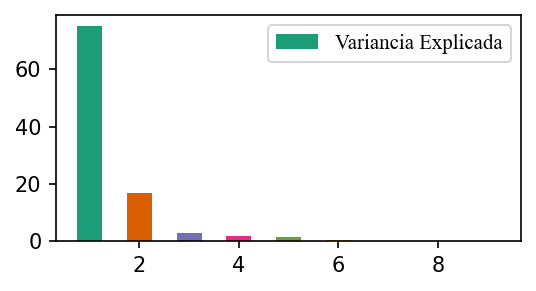

In [211]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150, gridspec_kw=None)
plt.rcParams["font.family"] = 'Times New Roman'
colors = plt.cm.Dark2(range(10)) # Dark2, Pastel1, Paired, Accent, Pastel2, Set1, Set2, Set3, tab10, tab20, tab10b, estas son diferentes paletas de colores
ve_pc=df_variancia_explicada.drop(0, axis=0)
x = ve_pc.index
altura = ve_pc['Variancia Explicada']
ax.bar(x=x, height=altura*100, width=0.5, color=colors, label='Variancia Explicada')
ax.legend(loc='best', fontsize=10);

In [216]:
from bokeh.io import output_notebook, show, output_file, export_png
from bokeh.plotting import figure, show
output_notebook()
colormap = {'CR': 'red', 'VR': 'green'}
colors = [colormap[x] for x in datos_pca1(['X', 'X', 'X', 'X', 'ASCI', 'IN(ASCI)', 'X', 'X', 'X', 'X', 'X', 'X'])
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

# Draw a chart
p = figure(title='PCA', plot_width=600, plot_height=400,
           x_axis_label='PCA 1', y_axis_label='PCA 2', toolbar_location="above", tools=TOOLS)

p.circle(datos_pca1[0], datos_pca1[1], color=colors, line_width=2, legend_label='colormap', 
         size=10, alpha=0.6)
p.ygrid.band_fill_color = "olive"
p.ygrid.band_fill_alpha = 0.1
p.legend.location = "top_right"
p.grid.visible = True
p.title.align = "center"
p.title.text_font_size = "20px"
#p.legend.location = "top_center"
#CR.set_axis(['X', 'X', 'X', 'X', 'ASCI', 'IN(ASCI)', 'X', 'X', 'X', 'X', 'X', 'X'], axis=1, inplace=True)

show(p)

SyntaxError: invalid syntax (Temp/ipykernel_16264/1200634927.py, line 6)